Hello, Valentina! Nice to see you again! :) 
    
My name is Olga. I'm happy to reviewing your project today.

You can find my comments in green, yellow or red boxes like this:


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Success. Everything is done succesfully.
</div>


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Remarks. Some recommendations.
</div>


<div class="alert alert-block alert-danger">
    
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
    
Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

<b>Please don't remove my comments :)</b>

You can answer me by using this: 

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Overallv reviewer's comment</b> <a class="tocSkip"></a>
    
Valentina, thank you for sending your project. Your project looks great! You did such a good job!
       
I especially liked the syntax and code style of your work. It was very detailed and laconic at the same time. Thank you for your conclusions. Excellent!
    
Glad to say that your project has been passed code review.
       
If you have any questions, please, send them. If not, just resend me a project and I accept it. :)
    
  
</div>

<div class="alert alert-block alert-success">
<b>Overallv reviewer's comment</b> <a class="tocSkip"></a>
    
I'm glad to say that your project has been accepted.
    
Keep up the good work, and good luck on the next sprint! :)
</div>

# Project Description

As an analyst working with Zuber a ride a new ride-sharing company that's launching in Chicago. Management wants to know if some pattern exist between the various information made available to better understand passenger preferences.

# Business Goal

Analysis the data given to help management better understand passengers preference through projects recommedations. This include:
1. Studying the file.
2. Identify the top 10 neighborhoods in terms of drop-offs.
3. Graphs on taxi companies and number of rides, top 10 neighborhoods by number of dropoffs.
4. Hypothesis test on whether; The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great start! We have an introduction and goal. It help us to understand the project.
</div>

In [1]:
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats as st
mpl.style.use(['ggplot'])

In [2]:
try:
    trip_name = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_01.csv')
    avg_dropoff = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_04.csv')
except:
    trip_name = pd.read_csv('/datasets/project_sql_result_01.csv')
    avg_dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you for try/except. It is a great decision. Import libraries at the beginning help us to set up working environment. Very good!
</div>

In [3]:
mas_cab = {'trip_name':trip_name,'avg_dropoff':avg_dropoff}

In [4]:
for name,df in mas_cab.items():
    f'{name}'
    print()
    df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
def missing_values(df):
    """ takes the dataframe and check for any missing values and calculate its' ratio"""
    df_nulls=pd.concat([df.dtypes, df.isna().sum(), df.isna().sum()/len(df)], axis=1)
    df_nulls.columns = ["type","count","missing_ratio"]
    df_nulls=df_nulls[df_nulls["count"]>0]
    df_nulls.sort_values(by="missing_ratio", ascending=False)
    return df_nulls

In [6]:
missing_values(trip_name)

,type,count,missing_ratio


In [7]:
missing_values(avg_dropoff)

,type,count,missing_ratio


In [8]:
trip_name.duplicated().sum()

0

In [9]:
avg_dropoff.duplicated().sum()

0

## Conclusion
The datasets includes trip_name(company name and the number of trips made) and  avg_dropoff(drop off locations and number of trips made). There are no missing or duplicated enteries in the datasets.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great! We checked our data and sure that they are good.
</div>

## The top 10 neighborhoods in terms of drop-offs

In [10]:
top_10_dropoff_loc= avg_dropoff.groupby('dropoff_location_name').sum().sort_values('average_trips',ascending=False).head(10)
top_10_dropoff_loc

,average_trips
dropoff_location_name,
Loop,10727.466667
River North,9523.666667
Streeterville,6664.666667
West Loop,5163.666667
O'Hare,2546.900000
Lake View,2420.966667
Grant Park,2068.533333
Museum Campus,1510.000000
Gold Coast,1364.233333


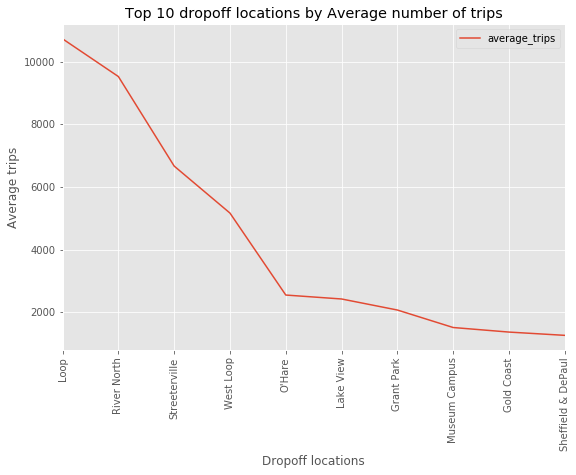

In [11]:
top_10_dropoff_loc.plot(kind='line',figsize=(9,6),title= 'Top 10 dropoff locations by Average number of trips')
plt.xlabel('Dropoff locations')
plt.ylabel('Average trips')
plt.title('Top 10 dropoff locations by Average number of trips')
plt.xticks(rotation =90)
plt.show();

## Conclusion
The highest drop off location is Loop followed by River North.

<div class="alert alert-block alert-success">
<b>Reviewer's comment.</b> <a class="tocSkip"></a>
    
Good idea to useline plot! :) 
</div>

## Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs

In [12]:
trip_name.groupby('company_name').sum().sort_values('trips_amount',ascending=False)

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasin,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
...,...
4053 - 40193 Adwar H. Nikola,7
2733 - 74600 Benny Jona,7
5874 - 73628 Sergey Cab Corp.,5


Grouped trip_name by company_name and sorted the data by trips_amount to determine the in descending order the company name and total number of trips made.

In [13]:
top_10_name = trip_name.groupby('company_name').sum().sort_values('trips_amount',ascending=False).head(10)
top_10_name

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasin,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


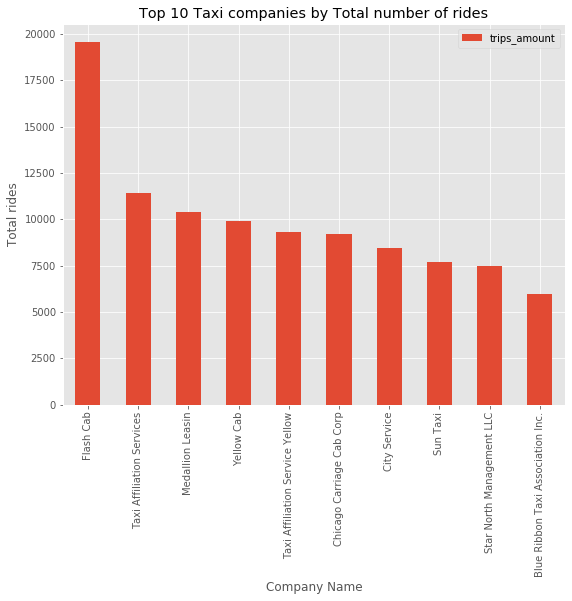

In [14]:
top_10_name.plot(kind='bar',figsize=(9,7),title= "Top 10 Taxi companies by Total number of rides")
plt.xlabel('Company Name')
plt.ylabel('Total rides')

plt.show();

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Very good graph! Thank you for sorted values for graph. It makes it more understandble.
    
Yes, flash cab is a best here. Perhaps, because of Flash or number of trips. :)
</div>

In [15]:
top_10_name['trips_amount'].mean()

9927.2

The data is filtered for the top 10 most performing companies and results plotted as above. Flash cab is the leading company irrespect of number of trips made.

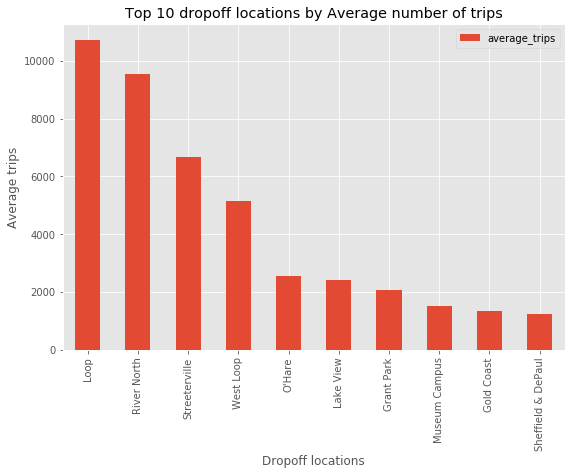

In [16]:
top_10_dropoff_loc.plot(kind='bar',figsize=(9,6),title= 'Top 10 dropoff locations by Average number of trips')
plt.xlabel('Dropoff locations')
plt.ylabel('Average trips')
plt.title('Top 10 dropoff locations by Average number of trips')

plt.show();

In [17]:
top_10_dropoff_loc['average_trips'].mean()

4324.986666666667

<div class="alert alert-block alert-success">
<b>Reviewer's comment.</b> <a class="tocSkip"></a>

Thank you!
</div>

## Conclusion

flash cab is the leading cab company in the chicago area with over 10k more trips than Blue Ribbin Taxi Association which is the 10th most popuplar cab in the area. Most destinations by ride are to Loop which is followed closely by River North. On average, about 10k rides are made by the top 10 cab companies.
On the other hand, Loop is the leading neighbourhood dropoff point for most passangers. Average trip by the leading top 10 neighbourhoods are about 4k.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great conclusion!

</div>

## Testing hypotheses 

In [18]:
try:
    ohare_airport = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_07.csv')
except:
    ohare_airport = pd.read_csv('/datasets/project_sql_result_07.csv')
ohare_airport

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


Where:

      Bad = stormy and rainny days and,
      
      Good = sunny etc.

In [19]:
ohare_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [20]:
ohare_airport['start_ts'] = pd.to_datetime(ohare_airport['start_ts'])

In [21]:
ohare_airport.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [22]:
ohare_airport.duplicated().sum()

197

### Conclusion
The data on trips to Ohare airport does not have any missing values. The start_ts column which was string has been converted to datetime stamp. There are 197 duplicated rows in the dataframe.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Another good checking! Great!

</div>

**NULL Hypothesis** The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

**Alternative Hypothesis** The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

In [23]:
rainy_days = ohare_airport[ohare_airport['weather_conditions']=='Bad']['duration_seconds'].unique()
sunny_days = ohare_airport[ohare_airport['weather_conditions']=='Good']['duration_seconds'].unique()

In [24]:
alpha = 0.05
results = st.ttest_ind(rainy_days,sunny_days,equal_var=False)
print('pvalue:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis: Average duration for rides changes on rainy saturdays.")
else:
    print("We can't reject the null hypothesis: Average duration for rides do not change on rainy saturdays.")
print('The mean values are:')
print(f' rainy_days mean = {rainy_days.mean()}')
print(f' sunny_days = {sunny_days.mean()}')    


pvalue: 0.00042094256249453315
We reject the null hypothesis: Average duration for rides changes on rainy saturdays.
The mean values are:
 rainy_days mean = 2416.935779816514
 sunny_days = 2115.1940639269405


## Conclusion
Considering there were some duplicated enteries in the dataset, only the unique rows were picked for the analysis.
The results indicate that, the average rides on rainy saturdays are different.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Excellent step!
  
Very good formulation of hypotheses, right alpha and test.
    
Yes, you are right. The average rides on rainy saturdays are different.
    
Very good that we check it by test. It give to us full picture.

</div>

## Final Conclusion
**Data Analysis**
There were no missing or duplicated values in the company_name, dropoff datasets. start_ts of the Ohare_airport dataset was converted to datetime. The duplicated values in the Ohare_airport dataset were not used in the hypothesis testing.

**Findings**
1. The top 5 dropoff neighbourhoods are Loop, Rover North, Streeterville, West Loop and O'Hare in descending order.
2. The top 5 Taxi companies are Flash cab, Taxi Affiliation Services,Medallion Leasin,Yellow Cab and Taxi Affiliation Service in descending order.
3. Average trip by the top 10 companies are about *10k* with the **least ride amongst the top 10 being Blue Ribbon Taxi Association Inc.(5953 trips) as against 19558 trips by Flash Cab.**
4. The hyposthesis test shows that, the average ride on rainy saturdays are different for trips to O'hare Airport.


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you for such big conclusion. We add information about the most popular taxi and neighborhoods and test results. Very good.
    
Great recommendation!

</div>